In [73]:
import pandas as pd

In [74]:
df = pd.read_csv('/Users/pbhagwat/DEV/CohortAnalysis/Cohort-Analysis/Data/Telco-Customer-Churn.csv')

In [75]:
pd.set_option('display.max_columns', 100)

In [76]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
df[df['customerID']=='9237-HQITU']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [116]:
df[df['customerID'].duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [122]:
len(df)

7043

In [123]:
len(df.groupby(['customerID']).sum())

7043

In [77]:
dummies = pd.get_dummies(
    df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' ]]
)

In [78]:
dummies.head()

,SeniorCitizen,tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [79]:
dummies = dummies[['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','Churn_Yes']]

In [80]:
data = dummies.join(df[['customerID','MonthlyCharges', 'TotalCharges','tenure']])

In [81]:
data.set_index('customerID', inplace=True)
data['TotalCharges'] = data[['TotalCharges']].replace([' '], '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [82]:
data.head()

,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Churn_Yes,MonthlyCharges,TotalCharges,tenure
customerID,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,29.85,29.85,1
5575-GNVDE,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,56.95,1889.50,34
3668-QPYBK,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,53.85,108.15,2
7795-CFOCW,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,42.30,1840.75,45
9237-HQITU,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,70.70,151.65,2


In [83]:
from lifelines import CoxPHFitter 
from sklearn.cross_validation import train_test_split

In [84]:
x_select = ['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','MonthlyCharges', 'TotalCharges','tenure', 'Churn_Yes']

In [85]:
cph_train, cph_test = train_test_split(data[x_select], test_size=0.2)

In [86]:
cph = CoxPHFitter()
cph.fit(cph_train, 'tenure', 'Churn_Yes')

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4160 right-censored observations>

In [87]:
cph.print_summary()

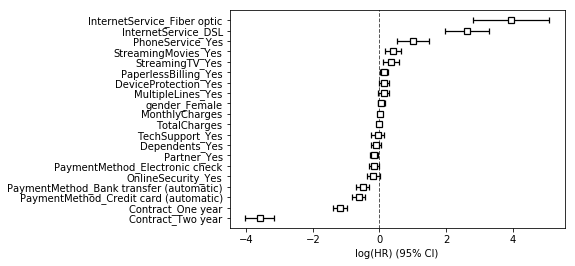

In [88]:
cph.plot()

Text(0.5, 0, 'tenure period')

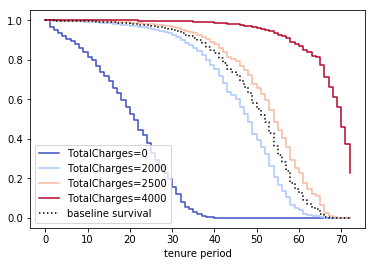

In [89]:
cph.plot_covariate_groups('TotalCharges',values=[0,2000,2500,4000], cmap='coolwarm').set_xlabel('tenure period')

## Churn Prediction
### Next step is to derive some insights and to make predictions of the existing customer behaviour 

In [90]:
# censored observation is one which is yet to have an ‘event’, i.e. customers who are yet to churn.
censored_subjects = data.loc[data['Churn_Yes']==0] 
print("Number of customers yet to churn:", len(censored_subjects))

Number of customers yet to churn: 5174


In [91]:
# predict_survival_function() creates the matrix containing a survival probability for each remaining customers 
#'unconditioned' survival function 'cuz some of these curves will predict churn before the customer's current tenure time
# row index => tenure period; column_index is the data index where Churn_Yes=0
unconditioned_sf = cph.predict_survival_function(censored_subjects)

In [92]:
unconditioned_sf.head()

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.970115,0.998423,0.999661,0.982273,0.980404,0.999940,0.969777,0.999938,0.999978,0.987796,1.0,0.999544,1.0,0.959383,0.999193,0.999993,0.999680,0.994185,1.0,1.0,0.651442,0.998734,0.995872,0.943490,1.0,0.998837,0.988465,0.999999,0.999091,0.999999,0.974115,0.998399,0.914167,0.999995,0.999998,0.998329,0.995169,0.999979,0.999993,0.999996,0.999976,1.0,0.999358,0.999912,0.999995,0.996100,0.853524,0.999616,0.999854,0.999978,...,0.999811,0.999997,0.982481,1.000000,0.969551,0.939592,0.999999,0.988135,0.995033,0.999308,0.999070,0.993884,0.997255,0.996807,0.999998,0.999707,0.999998,0.986498,0.873108,0.999767,1.000000,0.993350,0.998411,0.999541,0.999999,0.999998,0.998437,0.997863,0.996104,0.916863,0.999975,0.999944,0.996369,0.999997,0.999961,0.999198,0.958137,0.949993,0.999998,0.946881,0.991896,0.999924,0.995930,0.961620,0.992405,0.999985,0.997085,0.999998,0.986235,1.000000
2.0,0.955255,0.997621,0.999488,0.973375,0.970581,0.999910,0.954753,0.999906,0.999967,0.981644,1.0,0.999312,1.0,0.939356,0.998783,0.999990,0.999517,0.991239,1.0,1.0,0.523820,0.998090,0.993779,0.915976,1.0,0.998245,0.982647,0.999999,0.998628,0.999998,0.961204,0.997585,0.873366,0.999993,0.999997,0.997480,0.992720,0.999969,0.999990,0.999994,0.999964,1.0,0.999031,0.999867,0.999993,0.994121,0.787445,0.999421,0.999780,0.999967,...,0.999715,0.999996,0.973686,0.999999,0.954417,0.910273,0.999999,0.982153,0.992516,0.998956,0.998597,0.990787,0.995861,0.995186,0.999997,0.999558,0.999997,0.979699,0.814864,0.999649,0.999999,0.989984,0.997603,0.999308,0.999999,0.999998,0.997642,0.996778,0.994127,0.877256,0.999963,0.999916,0.994526,0.999996,0.999941,0.998790,0.937516,0.925519,0.999997,0.920948,0.987798,0.999886,0.993866,0.942662,0.988563,0.999977,0.995605,0.999997,0.979305,0.999999
3.0,0.942072,0.996900,0.999333,0.965434,0.961824,0.999882,0.941428,0.999878,0.999957,0.976139,1.0,0.999103,1.0,0.921685,0.998414,0.999986,0.999371,0.988595,1.0,1.0,0.430465,0.997511,0.991898,0.891895,1.0,0.997713,0.977440,0.999998,0.998212,0.999997,0.949728,0.9

In [93]:
# We've to condition the prediction on the basis that the customers were still with us when the data was collected
# c.name => row number(index) of the data where Churn_Yes=0
# data.loc[c.name, 'tenure'] => tenure value of specific index(c.name) in original data
# c.loc[data.loc[c.name, 'tenure']]<=1 always in unconditioned_cf, which may not be true cuz the customers might continue using the platform even after the date of collection of data
conditioned_sf = unconditioned_sf.apply(lambda c:(c/c.loc[data.loc[c.name, 'tenure']]).clip(upper=1))

In [94]:
conditioned_sf.head()

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2.0,0.984682,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.997898,0.970839,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.984391,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.956801,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3.0,0.971094,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.821781,1.0,0.996009,0.945316,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.959732,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.970548,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.919512,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996280,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4.0,0.956028,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.658934,1.0,0.993889,0.917399,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.916358,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.921624,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.955204,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.879290,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.992111,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [95]:
import matplotlib.pyplot as plt

In [96]:
customer = '1452-KIOVK'

In [97]:
df.loc[df['customerID'] == customer]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No


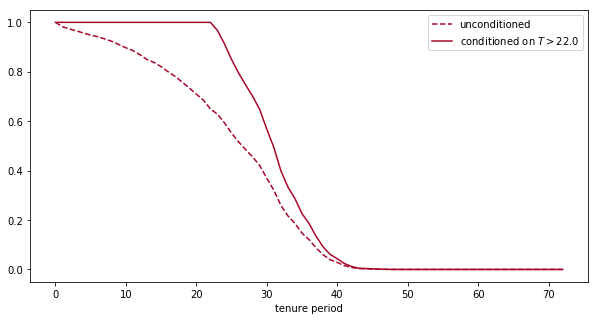

In [99]:
# investigate individual customers and see how the conditioning has affected their survival over the base line
plt.figure(figsize=(10, 5))
subject = customer
unconditioned_sf[subject].plot(ls="--", color="#A60628", label="unconditioned") 
conditioned_sf[subject].plot(color="#A60628", label=("conditioned on $T>%s$" % data.loc[subject]['tenure'])) # T>34 indicate that the customer is active even after 58 months
plt.xlabel('tenure period')
plt.legend()

### Getting actionable insights out of the model

In [67]:
from lifelines.utils import median_survival_times, qth_survival_times

In [68]:
# Predict the month number where the survival chance of customer is 50%
# This can also be modified as predictions_50 = qth_survival_times(.50, conditioned_sf), where the percentile can be modified depending on our requirement 
predictions_50 = median_survival_times(conditioned_sf) 
# predictions_10 = qth_survival_times(.10, conditioned_sf) #This provides the month where survival chance of customer is 10%

In [69]:
predictions_50

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.5,22.0,49.0,60.0,31.0,28.0,72.0,25.0,70.0,inf,33.0,inf,60.0,inf,27.0,52.0,inf,61.0,39.0,inf,inf,6.0,50.0,37.0,17.0,inf,54.0,33.0,inf,52.0,inf,25.0,54.0,14.0,inf,inf,51.0,38.0,inf,inf,inf,inf,inf,56.0,70.0,inf,40.0,10.0,61.0,67.0,inf,...,66.0,inf,32.0,inf,22.0,17.0,inf,34.0,40.0,54.0,53.0,37.0,43.0,45.0,inf,60.0,inf,35.0,17.0,69.0,inf,37.0,49.0,56.0,inf,inf,50.0,49.0,42.0,14.0,inf,71.0,38.0,inf,72.0,54.0,25.0,22.0,inf,18.0,32.0,70.0,45.0,26.0,35.0,inf,42.0,inf,30.0,inf


In [70]:
predictions_50[[customer]]

,1452-KIOVK
0.5,31.0


In [71]:
# Investigate the predicted remeaining value that a customer has for the business 
values = predictions_50.T.join(data[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure']) # With this we can predict which customers might inflict the highest damage to the business

In [72]:
values.loc[[customer]]

,0.5,MonthlyCharges,tenure,RemainingValue
1452-KIOVK,31.0,89.1,22,801.9


## Churn prevention - What can we do to keep them?

In [73]:
# Through coefficient chart we concluded that these 4 features i.e. Contract_Two year, Contract_One year, PaymentMethod_Credit card (automatic), PaymentMethod_Bank transfer (automatic)
# promotes the survival chances positively, so let's focus on those i.e reverse the existing values and see the resulting survival chances

upgrades = ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)', 'Contract_One year', 'Contract_Two year']
results_dict = {}

# Run this for all the customers 
actual = data.loc[[customer]]
change = data.loc[[customer]]
results_dict[customer] = [cph.predict_median(actual)]
for upgrade in upgrades:
    change[upgrade] = 1 if list(change[upgrade]) == [0] else 0
    results_dict[customer].append(cph.predict_median(change))
    change[upgrade] = 1 if list(change[upgrade]) == [0] else 0

In [74]:
results_dict

{'1452-KIOVK': [27.0, 22.0, 31.0, 38.0, 57.0]}

In [75]:
result_df = pd.DataFrame(results_dict).T
result_df.columns = ['baseline'] + upgrades
actions = values.join(result_df).drop([0.5], axis=1)

In [76]:
data.loc[[customer],upgrades]

,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
customerID,,,,
1452-KIOVK,1,0,0,0


In [77]:
# Notice that if we get the 1st customer to use CC we increase the survival period of cust '5575-GNVDE' by 5 months i.e. 46(baseline) -> 51(PaymentMethod_Credit card (automatic)) and so on..
# Note: Cust 5575-GNVDE was already having Contract_One year, after reverting it we can see that the survival chances goes down from 46 to 37
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
1452-KIOVK,89.1,22,801.9,27.0,22.0,31.0,38.0,57.0


##### Calculate what impact it has financially 

In [78]:
actions['CreditCard Diff'] = (actions['PaymentMethod_Credit card (automatic)'] - actions['baseline']) * actions['MonthlyCharges'] 
actions['BankTransfer Diff'] = (actions['PaymentMethod_Bank transfer (automatic)'] - actions['baseline']) * actions['MonthlyCharges']
actions['1yrContract Diff'] = (actions['Contract_One year'] - actions['baseline']) * actions['MonthlyCharges']
actions['2yrContract Diff'] = (actions['Contract_Two year'] - actions['baseline']) * actions['MonthlyCharges']

In [79]:
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff
1452-KIOVK,89.1,22,801.9,27.0,22.0,31.0,38.0,57.0,-445.5,356.4,980.1,2673.0


### Accuracy and Calibration
#### Calibration is the propensity of the model to get probabilities right over time (i.e. having high recall value)

In [80]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import numpy as np

In [81]:
cph_test.head()

,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges,TotalCharges,tenure,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,
5371-VYLSX,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,83.40,4113.70,50,0
4323-OHFOW,1,1,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,0,105.55,7195.35,70,0
8466-PZBLH,0,1,1,1,1,0,1,1,0,1,1,1,0,1,0,1,0,0,104.60,6885.75,67,0
1842-EZJMK,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,1,103.70,5071.05,50,1
0947-MUGVO,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,73.65,1463.50,20,1


Text(0.5, 1.0, 'Calibration plots (reliability curve)')

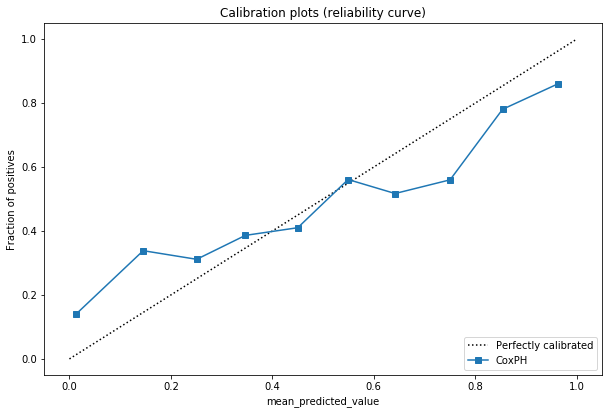

In [89]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2) 
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") 

probs = 1-np.array(cph.predict_survival_function(cph_test).loc[13]) # here tenure=13

actual = cph_test['Churn_Yes']

fraction_of_positives, mean_predicted_value = calibration_curve(actual, probs, n_bins=10, normalize=False) 

ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ("CoxPH"))

ax1.set_ylabel("Fraction of positives") 
ax1.set_ylim([-0.05, 1.05]) 
ax1.set_xlabel("mean_predicted_value") 
ax1.legend(loc="lower right") 
ax1.set_title('Calibration plots (reliability curve)')

In [83]:
# To understand how far away the line is from the perfect calibration we use brier_score_loss
brier_score_loss(cph_test['Churn_Yes'], 1-np.array(cph.predict_survival_function(cph_test).loc[13]), pos_label=1)

0.15965600051810114

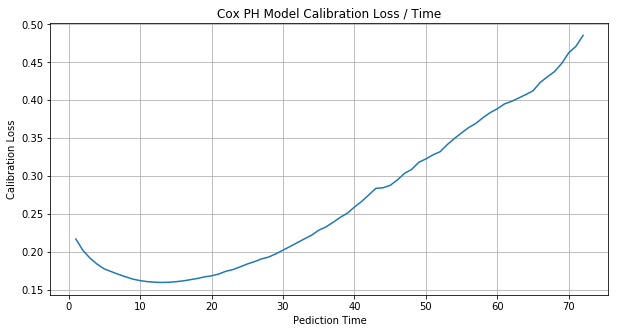

In [86]:
# Inspect the calibration of the model at all the time periods (above one is just for tenure=13)
loss_dict = {}
for i in range(1,73):
    score=brier_score_loss(cph_test['Churn_Yes'], 1-np.array(cph.predict_survival_function(cph_test).loc[i]), pos_label=1)
    loss_dict[i] = [score]
    
loss_df = pd.DataFrame(loss_dict).T

fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(loss_df.index, loss_df)
ax.set(xlabel='Pediction Time', ylabel='Calibration Loss', title='Cox PH Model Calibration Loss / Time')
ax.grid()

# Here we can see that the model is well caliberated b/w 5 and 25 months
plt.show() 

In [87]:
# upper and lower bounds for the expected return on investment from getting customers to make changes
loss_df.columns = ['loss'] 

temp_df = actions.reset_index().set_index('PaymentMethod_Credit card (automatic)').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['CreditCard Lower'] = temp_df['CreditCard Diff'] - (temp_df['loss'] * temp_df['CreditCard Diff']) 
actions['CreditCard Upper'] = temp_df['CreditCard Diff'] + (temp_df['loss'] * temp_df['CreditCard Diff']) 

temp_df = actions.reset_index().set_index('PaymentMethod_Bank transfer (automatic)').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['BankTransfer Lower'] = temp_df['BankTransfer Diff'] - (.5 * temp_df['loss'] * temp_df['BankTransfer Diff']) 
actions['BankTransfer Upper'] = temp_df['BankTransfer Diff'] + (.5 * temp_df['loss'] * temp_df['BankTransfer Diff']) 

temp_df = actions.reset_index().set_index('Contract_One year').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['1yrContract Lower'] = temp_df['1yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['1yrContract Diff']) 
actions['1yrContract Upper'] = temp_df['1yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['1yrContract Diff']) 

temp_df = actions.reset_index().set_index('Contract_Two year').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['2yrContract Lower'] = temp_df['2yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['2yrContract Diff']) 
actions['2yrContract Upper'] = temp_df['2yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])

In [88]:
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff,CreditCard Lower,CreditCard Upper,BankTransfer Lower,BankTransfer Upper,1yrContract Lower,1yrContract Upper,2yrContract Lower,2yrContract Upper
1452-KIOVK,89.1,22,801.9,27.0,22.0,31.0,38.0,57.0,-445.5,356.4,980.1,2673.0,-367.808931,-523.191069,319.496424,393.303576,859.81699,1100.38301,2179.062188,3166.937812


In [100]:
import streamlit as st